In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import re

def load_data_with_uncertainties(file_path: str, uncertainty_cols: list[int]) -> np.ndarray:
    data = np.genfromtxt(file_path, dtype=str)
    processed_data = []
    for i, col in enumerate(data.T): # iterate over columns
        if i in uncertainty_cols:
            parsed_vals = []
            for val in col:
                if val.lower() == 'nan':
                    parsed_vals.append((np.nan, np.nan))
                else:
                    parsed_vals.append(parse_uncertainty(val))
            parsed_vals = np.array(parsed_vals)
            processed_data.append(parsed_vals[:, 0]) # values
            processed_data.append(parsed_vals[:, 1]) # uncertainties
        else:
            processed_data.append(np.where(col == 'nan', np.nan, col.astype(float)))

    processed_data = np.column_stack(processed_data)
    # sort based on first column
    return processed_data[processed_data[:,0].argsort()]

def parse_uncertainty(value_with_uncertainty: str) -> tuple[float, float]:
    """
    Parses a string representing a float with uncertainty in the format
    `value(uncertainty)`

    Args:
        value_with_uncertainty (str): A string containing a value with
            uncertainty, e.g., '1.1(2)'.

    Returns:
        tuple[float, float]:
            - The numerical value as a float.
            - The uncertainty as a float.

    Raises:
        ValueError: If the input string is not in the correct format.

    Example:
        >>> parse_uncertainty("1.1(2)")
        (1.1, 0.2)
    """
    check = re.fullmatch(r"(-?[\d.]+)\((\d+)\)", value_with_uncertainty)
    if not check:
        raise ValueError("Input must be in the format 'value(uncertainty)', e.g. 1.1(2)")

    value = float(check.group(1))
    uncertainty_digits = check.group(2)
    uncertainty = float(uncertainty_digits) * 10**(-len(check.group(1).split('.')[-1]))
    return value, uncertainty

assert parse_uncertainty("1.1(2)") == (1.1, 0.2)


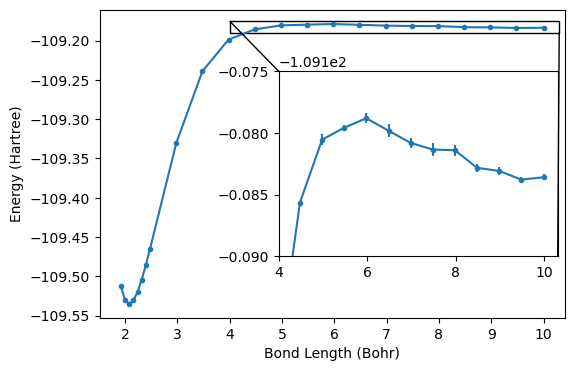

In [8]:

# Sample data
data_name = "N2_avtz_rhf.dat"
data = load_data_with_uncertainties(data_name, [1])
x = data[:,0]
y = data[:,1]
yerr = data[:,2]

# x = np.linspace(0, 10, 1000)
# y = np.sin(x) * np.exp(-0.1 * x)

# Define region of interest
xi, xf = 4, 10.3
yi, yf = -109.190, -109.175

# Create main plot
fig, ax = plt.subplots(figsize=(6, 4))
# ax.plot(x, y, '.-', label="Main curve")
ax.errorbar(x, y, yerr=yerr, fmt='.-', label="Main curve")
ax.set_xlabel("Bond Length (Bohr)")
ax.set_ylabel("Energy (Hartree)")
# ax.legend()

# Create inset

axins = inset_axes(ax, width="60%", height="60%", loc="center right")  # Adjust size and location
# axins.plot(x, y, '.-')  # Same data
axins.errorbar(x, y, yerr=yerr, fmt='.-', label="Main curve")
axins.set_xlim(xi, xf)
axins.set_ylim(yi, yf)
# axins.set_xticklabels([])
# axins.set_yticklabels([])

# Mark the region of interest
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black")

plt.savefig("inset_nontcfciqmc.pdf", bbox_inches='tight')

plt.show()


In [3]:
dat = "N2_avtz_rhf.dat"
dat.split("_")[-1].split(".")[0].upper()

'RHF'

ValueError: Input must be in the format 'value(uncertainty)', e.g. 1.1(2)

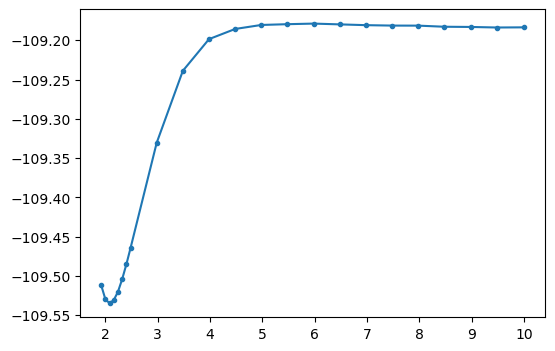

In [4]:

# Sample data
data_all = ["N2_avtz_rhf.dat", "N2_avtz_casci.dat", "N2_avtz_casscf.dat", "N2_avtz_fciqmc.dat"]
data_f12 = np.genfromtxt("N2_avtz_f12.dat")
data_exp = np.genfromtxt("experiment.dat")
fig, ax = plt.subplots(figsize=(6, 4))

for data_name in data_all:
    data = load_data_with_uncertainties(data_name, [1])
    data_name = data_name.split("_")[-1].split(".")[0].upper()
    x = data[:,0]
    y = data[:,1]
    yerr = data[:,2]
    ax.errorbar(x, y, yerr=yerr, fmt='.-', label=f"{data_name}-Jastrow")
    # ax.plot(x, y, '.-', label=f"{data_name}-Jastrow")

# ax.plot(data_f12[:,0], data_f12[:,1], '.-', label="MRCI-F12")
# x = np.linspace(0, 10, 1000)
# y = np.sin(x) * np.exp(-0.1 * x)

# Define region of interest
xi, xf = 4, 10.3
yi, yf = -109.190, -109.175

# Create main plot
ax.set_xlabel("Bond Length (Bohr)")
ax.set_ylabel("Energy (Hartree)")
ax.legend()

# # Create inset
# axins = inset_axes(ax, width="60%", height="60%", loc="lower right")  # Adjust size and location
# axins.plot(x, y, '.-')  # Same data
# axins.set_xlim(xi, xf)
# axins.set_ylim(yi, yf)
# axins.set_xticklabels([])
# axins.set_yticklabels([])

# # Mark the region of interest
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black")

plt.savefig("all_binding_curves.pdf", bbox_inches='tight')

plt.show()


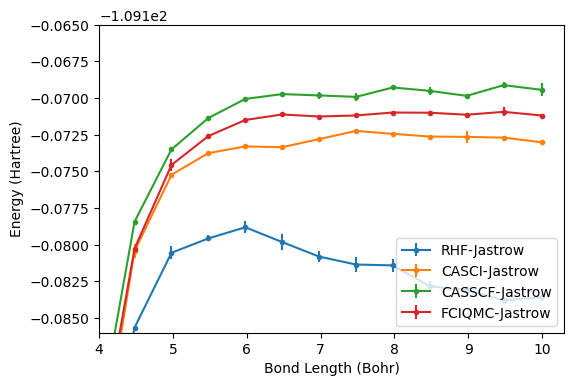

In [ ]:

# Sample data
data_all = ["N2_avtz_rhf.dat", "N2_avtz_casci.dat", "N2_avtz_casscf.dat", "N2_avtz_fciqmc.dat"]
data_f12 = "N2_avtz_f12.dat"
data_exp = np.genfromtxt("experiment.dat")
fig, ax = plt.subplots(figsize=(6, 4))

for data_name in data_all:
    data = load_data_with_uncertainties(data_name, [1])
    data_name = data_name.split("_")[-1].split(".")[0].upper()
    x = data[:,0]
    y = data[:,1]
    yerr = data[:,2]

# x = np.linspace(0, 10, 1000)
# y = np.sin(x) * np.exp(-0.1 * x)

    # Define region of interest
    xi, xf = 4, 10.3
    yi, yf = -109.186, -109.165

    # Create main plot
    # ax.plot(x, y, '.-', label=f"{data_name}-Jastrow")
    ax.errorbar(x, y, yerr=yerr, fmt='.-', label=f"{data_name}-Jastrow")
    ax.set_xlabel("Bond Length (Bohr)")
    ax.set_ylabel("Energy (Hartree)")
    ax.set_xlim(xi, xf)
    ax.set_ylim(yi, yf)
    ax.legend(loc="lower right")

# # Create inset
# axins = inset_axes(ax, width="60%", height="60%", loc="lower right")  # Adjust size and location
# axins.plot(x, y, '.-')  # Same data
# axins.set_xticklabels([])
# axins.set_yticklabels([])

# # Mark the region of interest
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black")

plt.savefig("all_binding_curves_dissociated.pdf", bbox_inches='tight')

plt.show()


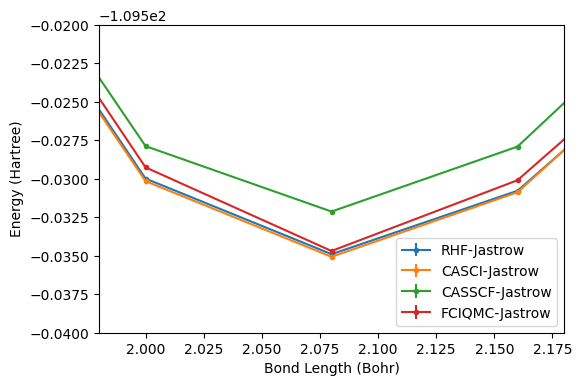

In [ ]:

# Sample data
data_all = ["N2_avtz_rhf.dat", "N2_avtz_casci.dat", "N2_avtz_casscf.dat", "N2_avtz_fciqmc.dat"]
data_f12 = "N2_avtz_f12.dat"
data_exp = np.genfromtxt("experiment.dat")
fig, ax = plt.subplots(figsize=(6, 4))

for data_name in data_all:
    data = load_data_with_uncertainties(data_name, [1])
    data_name = data_name.split("_")[-1].split(".")[0].upper()
    x = data[:,0]
    y = data[:,1]
    yerr = data[:,2]

# x = np.linspace(0, 10, 1000)
# y = np.sin(x) * np.exp(-0.1 * x)

    # Define region of interest
    xi, xf = 1.98, 2.18
    yi, yf = -109.54, -109.52

    # Create main plot
    # ax.plot(x, y, '.-', label=f"{data_name}-Jastrow")
    ax.errorbar(x, y, yerr=yerr, fmt='.-', label=f"{data_name}-Jastrow")
    ax.set_xlabel("Bond Length (Bohr)")
    ax.set_ylabel("Energy (Hartree)")
    ax.set_xlim(xi, xf)
    ax.set_ylim(yi, yf)
    ax.legend(loc="lower right")

# # Create inset
# axins = inset_axes(ax, width="60%", height="60%", loc="lower right")  # Adjust size and location
# axins.plot(x, y, '.-')  # Same data
# axins.set_xticklabels([])
# axins.set_yticklabels([])

# # Mark the region of interest
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black")

plt.savefig("all_binding_curves_min.pdf", bbox_inches='tight')

plt.show()
